<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lab - Evaluating Classifiers: The Confusion Matrix and AUC-ROC

**_Dr. Junaid Qazi, PhD_**

## Let's work with the breast cancer dataset!
I have intentionally left the code at some places!

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

np.set_printoptions(precision=4)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')
sns.set(font_scale=1.5)

### Load the UCI breast cancer data

Below we will load the medical data on breast cancer detection.

In [3]:
# the columns/features we want to work with
column_names = ['id',
                'clump_thickness',
                'cell_size_uniformity',
                'cell_shape_uniformity',
                'marginal_adhesion',
                'single_epithelial_size',
                'bare_nuclei',
                'bland_chromatin',
                'normal_nucleoli',
                'mitoses',
                'class']

# Reading directly from the source
bcw = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', 
                  names=column_names)

**Get the overview on your dataset.**

In [4]:
#Code here please
bcw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      699 non-null    int64 
 1   clump_thickness         699 non-null    int64 
 2   cell_size_uniformity    699 non-null    int64 
 3   cell_shape_uniformity   699 non-null    int64 
 4   marginal_adhesion       699 non-null    int64 
 5   single_epithelial_size  699 non-null    int64 
 6   bare_nuclei             699 non-null    object
 7   bland_chromatin         699 non-null    int64 
 8   normal_nucleoli         699 non-null    int64 
 9   mitoses                 699 non-null    int64 
 10  class                   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [4]:
# NO CODE HERE!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                        699 non-null int64
clump_thickness           699 non-null int64
cell_size_uniformity      699 non-null int64
cell_shape_uniformity     699 non-null int64
marginal_adhesion         699 non-null int64
single_epithelial_size    699 non-null int64
bare_nuclei               699 non-null object
bland_chromatin           699 non-null int64
normal_nucleoli           699 non-null int64
mitoses                   699 non-null int64
class                     699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


**Summary statistics please.**

In [5]:
#Code here please
bcw.describe()

,id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [6]:
# NO CODE HERE!

,id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [7]:
# there is some issue in 'bare_nuclei' colums, the value are '?', let's deal with this first!
bcw[bcw['bare_nuclei']=='?'].head(2)

,id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2


**Replace '?' with NaN and drop all NaN entries.**

In [6]:
#Code here please
bcw.replace('?',np.nan,inplace=True)
bcw.dropna(inplace=True)
bcw = bcw.astype({'bare_nuclei': float})
bcw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      683 non-null    int64  
 1   clump_thickness         683 non-null    int64  
 2   cell_size_uniformity    683 non-null    int64  
 3   cell_shape_uniformity   683 non-null    int64  
 4   marginal_adhesion       683 non-null    int64  
 5   single_epithelial_size  683 non-null    int64  
 6   bare_nuclei             683 non-null    float64
 7   bland_chromatin         683 non-null    int64  
 8   normal_nucleoli         683 non-null    int64  
 9   mitoses                 683 non-null    int64  
 10  class                   683 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 64.0 KB


In [9]:
# NO CODE HERE!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
id                        683 non-null int64
clump_thickness           683 non-null int64
cell_size_uniformity      683 non-null int64
cell_shape_uniformity     683 non-null int64
marginal_adhesion         683 non-null int64
single_epithelial_size    683 non-null int64
bare_nuclei               683 non-null float64
bland_chromatin           683 non-null int64
normal_nucleoli           683 non-null int64
mitoses                   683 non-null int64
class                     683 non-null int64
dtypes: float64(1), int64(10)
memory usage: 64.0 KB


**How many class and class instances we have in our target columns.** 

In [7]:
#Code here please
bcw['class'].value_counts()

2    444
4    239
Name: class, dtype: int64

In [11]:
# NO CODE HERE!

2    444
4    239
Name: class, dtype: int64

**Use lambda function and map to replace `2 with 0` and `4 with 1`.** Hint: Grab the `'class'`

In [8]:
#Code here please
bcw['class'] = bcw['class'].map(lambda value: 1 if value==4 else 0)
bcw['class'].value_counts()

0    444
1    239
Name: class, dtype: int64

In [13]:
# NO CODE HERE!

In [14]:
y.value_counts()

0    444
1    239
Name: class, dtype: int64

**Use iloc to grab all the features in `X`.** 

In [9]:
#Code here please
X = bcw.iloc[:, 1:-1]
y = bcw['class']
X.head()

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


In [16]:
# NO CODE HERE!

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


**Now we have features in `X` and targets in `y`, let's scale the features.**

In [17]:
#Code here please

In [10]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler
# Creating instance 'scaler'
scaler = StandardScaler()
# fit scaler
scaler.fit(X)
# get scaled features in X_scaled
X_scaled = scaler.transform(X)

**Split the data into 70% training and 30% testing. Fit a KNN classifier with `n_neighbors=5` on the training data.** Please use `random_state=101`.

In [11]:
#Code here please
X_train , X_test , y_train , y_test = train_test_split(X_scaled, y, test_size = .3, random_state=101, stratify = y)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [20]:
# NO CODE HERE!

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

**What is the baseline accuracy for your test data, compare it with the model accuracy**.

In [12]:
#Code here please
#Here we use the most frequent for baseline
print(f'Baseline:\t{(y_test.value_counts()[0]/len(y_test))}')
print(f'Model score:\t{knn.score(X_test,y_test)}')

Baseline:	0.6487804878048781
Model score:	0.9512195121951219


In [23]:
# NO CODE HERE!

Baseline:	 0.6341463414634146
Model score:	 0.9707317073170731 

**Calculate the predicted labels and print first 10 only.**

In [13]:
#Code here please
# predicted first ten rows of test class:
knn.predict(X_test[0:10])

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [25]:
# NO CODE HERE!

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0])

**What are the predicted probabilities for your test data, print the first 10.**

In [14]:
#Code here please
# predicted test probability:
knn.predict_proba(X_test[0:10])

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ]])

In [27]:
# NO CODE HERE!

array([[1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ]])

#### Create the confusion matrix for your classfier's performance on the test set.

In [15]:
#Code here please
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
y_true = y_test
con_mat = confusion_matrix(y_true, y_pred)
con_mat

array([[130,   3],
       [  7,  65]], dtype=int64)

In [29]:
# NO CODE HERE!

array([[ 71,   4],
       [  2, 128]])

**Little better and readable!**

In [30]:
confusion = pd.DataFrame(con_mat, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
#confusion
# We can set the background as well!
confusion.style.background_gradient(cmap='Greens')

,predicted_cancer,predicted_healthy
is_cancer,71,4
is_healthy,2,128


In [15]:
#code here please
confusion = pd.DataFrame(con_mat, index=['is_healthy','is_cancer'],
                         columns=['predicted_healthy','predicted_cancer'])
#confusion
# We can set the background as well!
confusion.style.background_gradient(cmap='Greens')

,predicted_healthy,predicted_cancer
is_healthy,130,3
is_cancer,7,65


In the lecture, we have learned how to get the prediction class and probabilities for each class from the trained classifier. Sometime, threshold is important, let's try to explore a situation here.

## Changing the threshold for prediction

---

**The prediction of the classifier defaults to guessing the class that has the highest predicted probability**. This necessarily leads to the highest possible accuracy (**only a guarantee for the training data!**). 

***However, it could be the case that maximizing the accuracy is not, in fact, our ultimate goal. Consider the following scenario:***

> **Cancer detection:** You have developed a classifier to detect, based on some medical measurements, whether or not a person has a cancerous tumor or not. Your classifier gets a 96% accuracy compared to a 60% baseline accuracy.

&#9758; **Read and Reflect:**  Your classifier is performing well, but what might be wrong with just maximizing the accuracy in this case? Think back to the confusion matrix and your goal (to treat cancer patients before it is too late).

<a id='change-threshold'></a>

### Lower the threshold for predicting cancer

Right now the classifier is choosing to label **cancer vs. healthy based on the 0.5 predicted probability threshold**. 

&#9758; *Say our goal was to have 0 false negatives: in other words, in no case do we want to predict the person is healthy when in fact they have cancer!*

1. Create a dataframe of the predicted probabilities (class 0 and class 1 probabilities). *Hint: We have the probabilities of both classes in `predict_proba()`*.

**Get the predicted probability vector and explicitly name the columns:**

In [16]:
#Code here please
pred_proba = knn.predict_proba(X_test)
Y_pp = pd.DataFrame(pred_proba, columns=['class_0_pp','class_1_pp'])
Y_pp.head()

,class_0_pp,class_1_pp
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.4,0.6
4,0.0,1.0


In [32]:
# NO CODE HERE!

,class_0_pp,class_1_pp
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,0.2,0.8
4,0.0,1.0


2. Create a new column with predicted labels where the threshold for labeling cancer/1 is 10% rather than 50%
    - In other words, the predicted probability of class 1 only needs to be greater than 0.10 for the label to be 1.

Hint: You can use list comprehension with if-else along with for loop and/or you can use apply and lambda function or regular function as well. <br>

*In order to do this, we can lower the threshold for predicting class 1. This will reduce our false negative rate to 0, but at the expense of a higher false positive rate.*

In [20]:
#Code here please
Y_pp['pred_class_thresh10'] = [1 if x >= 0.10 else 0 for x in Y_pp.class_1_pp.values]
Y_pp.head()

,class_0_pp,class_1_pp,pred_class_thresh10
0,1.0,0.0,0
1,1.0,0.0,0
2,1.0,0.0,0
3,0.4,0.6,1
4,0.0,1.0,1


In [34]:
Y_pp['pred_class_thresh10'] = [1 if x >= 0.10 else 0 for x in Y_pp.class_1_pp.values]
Y_pp.head()

,class_0_pp,class_1_pp,pred_class_thresh10
0,1.0,0.0,0
1,0.0,1.0,1
2,1.0,0.0,0
3,0.2,0.8,1
4,0.0,1.0,1


3. Recreate the confusion matrix with the predictions using the new threshold.

In [21]:
#Code here please
y_pred = Y_pp.pred_class_thresh10.values
con_mat = confusion_matrix(y_true, y_pred)
confusion = pd.DataFrame(con_mat, index=['is_healthy','is_cancer'],
                         columns=['predicted_healthy','predicted_cancer'])
#confusion
# We can set the background as well!
confusion.style.background_gradient(cmap='Greens')
print(y_true.shape)
(y_pred.shape)
(Y_pp.shape)

(205, 3)

In [36]:
# NO CODE HERE!

,predicted_cancer,predicted_healthy
is_cancer,74,1
is_healthy,3,127


<a id='roc-curve'></a>

## The Receiver operating characteristic (ROC) curve

---

The ROC curve is a popular visual of the performance of a classifier. It has a **few attractive properties**:
- It plots the **True Positive Rate (TPR)** versus the **False Positive Rate (FPR)** as the threshold for predicting 1 changes.
- We measure the area under the curve.
- If the TPR is always 1, the area under the curve is 1 (it cannot be larger). This is equivalent to perfect prediction.
- When the area under the curve is 0.50, this is equivalent to the baseline (chance) prediction.
- If the area is smaller than 0.5, it would be better to swap the predicted labels. 

Even though the area under the ROC curve is directly related to the accuracy, the AUC-ROC is preferred over the accuracy because it is automatically adjusted to the baseline and gives a robust picture of how the classifier performs at different threshold choices. 

**Note:**
- As the class assignment threshold increases for the positive class (has cancer), the false positive rate and true positive rate necessarily increase.
- A classifier performing at chance corresponds to the diagonal dotted line: an equal chance of false positives and true positives.
- The greater the area under the curve, the higher the ratio of true positives to false positives as the threshold becomes more lenient.
- The greater the area under the curve, the higher the quality of the classification model. 
- Most classification problems will never get close to a full 1.0 area under the curve: the Wisconsin breast cancer data is unique in that the signal is extremely strong. If you see this, it often indicates that something is wrong with your procedure (or, if you are predicting on the training set, that your model is over-fitting.)

### Below is code to plot the ROC curve for our cancer data.

In [19]:
from sklearn.metrics import roc_curve, auc

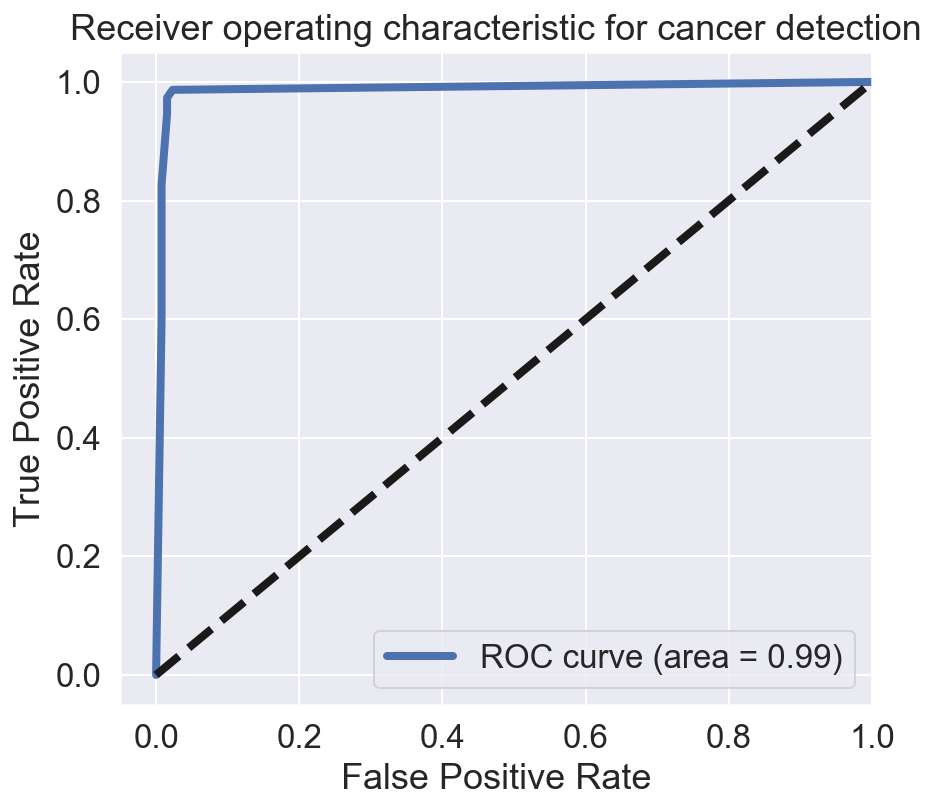

In [38]:
# For class 1, find the area under the curve
fpr, tpr, threshold = roc_curve(y_test, Y_pp.class_1_pp)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[6,6])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

<a id='table'></a>

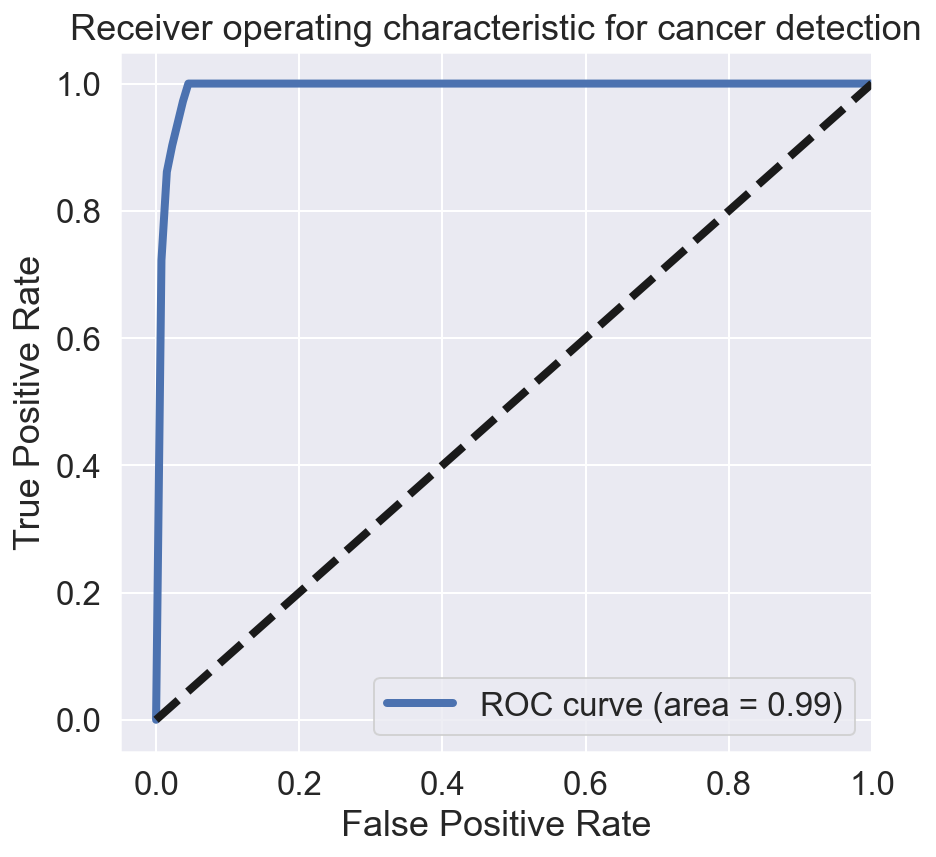

In [20]:
# For class 1, find the area under the curve
fpr, tpr, threshold = roc_curve(y_test, Y_pp.class_1_pp)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[6,6])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [39]:
# in-case, you want to see fpr, tps and threshold! -- practice for zip()!
#print('fpr\t', 'tpr\t', 'threshold')
#print(np.array(list(zip(fpr,tpr,threshold))))

# Train your logistic regression algorithm on the same breast cancer data and compare your results with KNN. 

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [23]:
#Here we use the most frequent for baseline
print(f'Baseline:\t{(y_test.value_counts()[0]/len(y_test))}')
print(f'Model score:\t{knn.score(X_test,y_test)}')

Baseline:	0.6487804878048781
Model score:	0.9512195121951219


In [24]:
#Code here please
# predicted first ten rows of test class:
logreg.predict(X_test[0:10])

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [25]:
#Code here please
# predicted test probability:
logreg.predict_proba(X_test[0:10])

array([[9.8868e-01, 1.1325e-02],
       [9.9884e-01, 1.1603e-03],
       [9.9809e-01, 1.9080e-03],
       [6.1537e-01, 3.8463e-01],
       [9.7634e-04, 9.9902e-01],
       [9.5174e-01, 4.8256e-02],
       [9.9686e-01, 3.1361e-03],
       [9.8622e-01, 1.3784e-02],
       [9.8547e-01, 1.4530e-02],
       [9.9067e-01, 9.3297e-03]])

In [26]:
from sklearn.metrics import confusion_matrix
y_pred_logreg = logreg.predict(X_test)
y_true = y_test
con_mat_logreg = confusion_matrix(y_true, y_pred_logreg)
con_mat_logreg

array([[129,   4],
       [  4,  68]], dtype=int64)

In [27]:
#code here please
confusion_logreg = pd.DataFrame(con_mat_logreg, index=['is_healthy','is_cancer'],
                         columns=['predicted_healthy','predicted_cancer'])
#confusion
# We can set the background as well!
confusion_logreg.style.background_gradient(cmap='Greens')

,predicted_healthy,predicted_cancer
is_healthy,129,4
is_cancer,4,68


In [28]:
#Code here please
pred_proba_logreg = logreg.predict_proba(X_test)
Y_pp_logreg = pd.DataFrame(pred_proba_logreg, columns=['class_0_pp','class_1_pp'])
Y_pp_logreg.head()

,class_0_pp,class_1_pp
0,0.988675,0.011325
1,0.998840,0.001160
2,0.998092,0.001908
3,0.615370,0.384630
4,0.000976,0.999024


In [29]:
#Code here please
Y_pp_logreg['pred_class_thresh10'] = [1 if x >= 0.10 else 0 for x in Y_pp_logreg.class_1_pp.values]
Y_pp_logreg.head()

,class_0_pp,class_1_pp,pred_class_thresh10
0,0.988675,0.011325,0
1,0.998840,0.001160,0
2,0.998092,0.001908,0
3,0.615370,0.384630,1
4,0.000976,0.999024,1


In [30]:
#Code here please
y_pred_logreg = Y_pp_logreg.pred_class_thresh10.values
con_mat_logreg = confusion_matrix(y_true, y_pred_logreg)
confusion_logreg = pd.DataFrame(con_mat_logreg, index=['is_healthy','is_cancer'],
                         columns=['predicted_healthy','predicted_cancer'])
#confusion
# We can set the background as well!
confusion_logreg.style.background_gradient(cmap='Greens')

,predicted_healthy,predicted_cancer
is_healthy,127,6
is_cancer,0,72


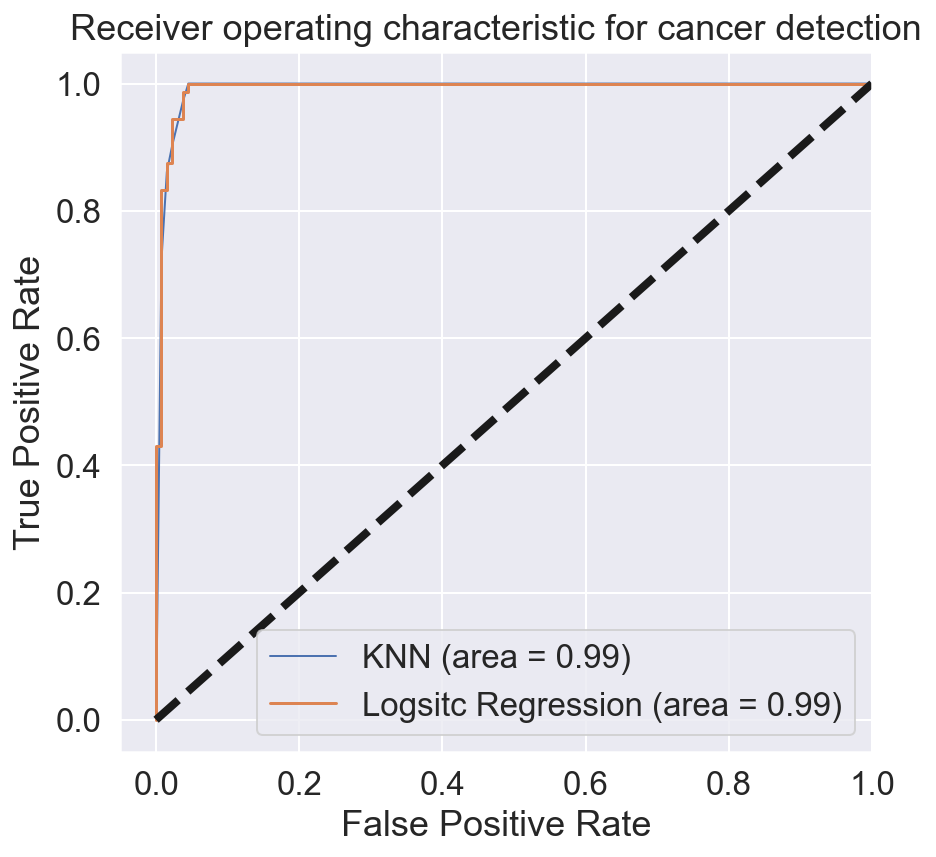

In [31]:
# For class 1, find the area under the curve
fpr_logreg, tpr_logreg, threshold = roc_curve(y_test, Y_pp_logreg.class_1_pp)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[6,6])
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % roc_auc, linewidth=1)
plt.plot(fpr_logreg,tpr_logreg,label='Logsitc Regression (area = %0.2f)' % roc_auc_logreg)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

They performed same.